## Chapter 3 - Classification

In [138]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist['data'], mnist['target']

In [30]:
# dimensions of the data. the 784 represents the feature columns while 70000 represents the number of samples
# the original images are 28x28 pixels which becomes 784 when the images are vectorized (28x28=784)
X.shape  

(70000, 784)

In [31]:
# the labels that are assigned to each image
y.shape

(70000,)

In [72]:
# curious to see what the raw data looks like
# grabbed one sample vector and reshaped it to its original 28x28 dimensions
digit = X[16081]
digit_img = digit.reshape(28,28)
digit_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2,   4, 107, 234, 255, 206,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4, 138, 196, 253, 253, 253, 253, 205,  10,   0,   0,   0,   0,
          0,   0],
       [  

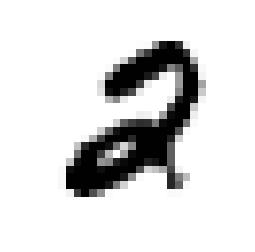

2.0

In [73]:
# plot of the sample image as well as printing the corresponding label
# it's a 2 (:
plt.imshow(digit_img,cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis('off')
plt.show()
y[16001]

In [60]:
# split the MNIST test set into train and test for features and labels
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [61]:
# shuffle the dataset to ensure that the algorithm gets the imgages in a random order
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [62]:
shuffle_index

array([35571, 44466, 41594, ...,  3280, 48025, 51019])

### Training a binary classifier

In [63]:
# train on a subset of the data, in this case the #5
# first step is to create the target vectors

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [64]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [74]:
sgd_clf.predict([digit])

array([ True], dtype=bool)

In [80]:
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

array([ 0.87463557,  0.86327279,  0.849     ,  0.87021755,  0.86687229])

In [103]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [104]:
confusion_matrix(y_train, y_train_pred)

array([[5857,   66,    0,    0,    0,    0,    0,    0,    0,    0],
       [6659,   83,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000, 4958,    0,    0,    0,    0,    0,    0,    0,    0],
       [5984,  147,    0,    0,    0,    0,    0,    0,    0,    0],
       [5814,   28,    0,    0,    0,    0,    0,    0,    0,    0],
       [5384,   37,    0,    0,    0,    0,    0,    0,    0,    0],
       [5837,   81,    0,    0,    0,    0,    0,    0,    0,    0],
       [6213,   52,    0,    0,    0,    0,    0,    0,    0,    0],
       [5803,   48,    0,    0,    0,    0,    0,    0,    0,    0],
       [5938,   11,    0,    0,    0,    0,    0,    0,    0,    0]])

In [113]:
precision_score(y_train_2, y_train_pred, average='binary')

0.89965523498457634

In [117]:
recall_score(y_train_2, y_train_pred, average='binary')

0.83215844243034576

In [119]:
f1_score(y_train_2, y_train_pred)

0.86459150754206981

In [129]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2,
                             cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Percentage')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

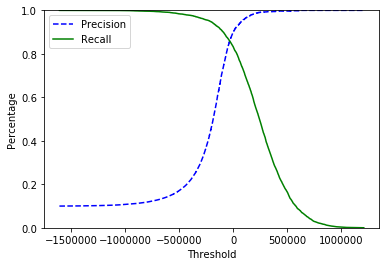

In [130]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [131]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [132]:
sgd_clf.predict([digit])

array([ 2.])

In [133]:
digit_scores = sgd_clf.decision_function([digit])
digit_scores

array([[-209719.5389927 , -727708.17844147,  334972.20761848,
        -437379.60195413, -859716.03627439, -564981.74058034,
        -779805.46140809, -912861.44234215, -301993.10821243,
        -531956.00246401]])

In [135]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([digit])

array([ 2.])

In [136]:
forest_clf.predict_proba([digit])

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [137]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.86767646,  0.87099355,  0.86322948])

In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([ 0.90996801,  0.90704535,  0.91103666])

in progress, page 96